<a href="https://colab.research.google.com/github/yunisindhu/Robusters/blob/master/Sindhu_OptimizationAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment on Optimization**





In [7]:
!pip install pulp

     |████████████████████████████████| 40.6MB 99kB/s 


Solution for Problem 1:

Problem#1:
MAXIMIZE
25*x + 55*y + 0
SUBJECT TO
_C1: x + y <= 5

_C2: 3 x + 2 y <= 12

VARIABLES
x Continuous
y Continuous

Optimal
0.0 5.0 275.0


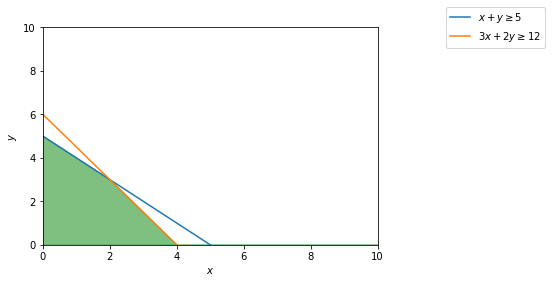

In [24]:
Lp_prob =  p.LpProblem('Problem#1',  p.LpMaximize)

# Creating Problem Variables
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0

# Objective Function 
Lp_prob += 25 * x + 55 * y   # x,y are defined variables 

# Constraints: 
Lp_prob += 1 * x + 1 * y <= 5
Lp_prob += 3 * x + 2 * y <= 12

# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve()    # Solver
print(p.LpStatus[status])   # The solution status 

# Printing the final solution 
print(p.value(x), p.value(y),p.value(Lp_prob.objective)) 

### for graphical represenation 
z = np.linspace(0, 600, 10000)
#Constraints
y1 = (5- z)
y2 = (12 - 3 * z)/2
# Make plot
plt.plot(z, y1, label=r'$x+y\geq5$')
plt.plot(z, y2, label=r'$3x+2y\geq12$')
plt.xlim((0, p.value(x)+ 10))
plt.ylim((0, p.value(x)+ 10))
#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y1)
plt.fill_between(z, y5, color='green',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()

Solution for Problem 2:

In [5]:
from cvxopt import matrix, solvers
Q = 2 * matrix([  [2,  .5],  [.5,  1]  ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A  =  matrix([1.0,  1.0],  (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b) 

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.


In [6]:
print(sol['x'])
print(sol['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


Solution to Problem 3:

In [9]:
%matplotlib inline 
import pulp as p
#To Create scatter line, bars, charts and  figure  
import matplotlib.pyplot as plt 
#Whole-some package for scientific operations
import numpy as np

In [16]:
Lp_prob =  p.LpProblem('Problem#3',  p.LpMinimize)

# Creating Problem Variables
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0
z = p.LpVariable("z", lowBound = 0)   # Create a variable z >= 0 
a = p.LpVariable("a", lowBound = 0)   # Create a variable a >= 0
b = p.LpVariable("b", lowBound = 0)   # Create a variable b >= 0 
c = p.LpVariable("c", lowBound = 0)   # Create a variable c >= 0

# Objective Function 
Lp_prob += x+y+z+a+b+c   # x,y,z,a,b,c are defined variables 

# Constraints: 
Lp_prob += x + y >=1 
Lp_prob += x + y + c >= 1
Lp_prob += z + a >= 1
Lp_prob += z + a + b >= 1
Lp_prob += a + b + c >= 1
Lp_prob += y + a + b >= 1


# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve()  
print(p.LpStatus[status])   # The solution status  if 1-optimal, 0- no solution 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(z), p.value(a), p.value(b), p.value(c),p.value(Lp_prob.objective)) 


Problem#3:
MINIMIZE
1*a + 1*b + 1*c + 1*x + 1*y + 1*z + 0
SUBJECT TO
_C1: x + y >= 1

_C2: c + x + y >= 1

_C3: a + z >= 1

_C4: a + b + z >= 1

_C5: a + b + c >= 1

_C6: a + b + y >= 1

VARIABLES
a Continuous
b Continuous
c Continuous
x Continuous
y Continuous
z Continuous

Optimal
1.0 0.0 0.0 1.0 0.0 0.0 2.0


Solution for Problem 4:

In [32]:
import pulp as p
import matplotlib.pyplot as plt #Used for creating scatter line bars, charts, figure 
import numpy as np # a whole-some package for performing basic scientific operations

Lp_prob = p.LpProblem('Problem#4i', p.LpMaximize)

#	Create problem Variables	
x	= p.LpVariable("x", lowBound	=	0)	#	Create	a	variable	x	>=	0
y	= p.LpVariable("y", lowBound	=	0)	#	Create	a	variable	y	>=	0
z = p.LpVariable("z", lowBound	=	0)	#	Create	a	variable	z	>=	0
a	= p.LpVariable("a", lowBound	=	0)	#	Create	a	variable	a	>=	0

# Objective Function
Lp_prob += 14 * x + 8 * y + 6 * z + 6 * a

# Constraints:
Lp_prob += 28 * x + 15 * y + 13 * z + 12 * a <= 39

# Display the problem 
print(Lp_prob)

status  =  Lp_prob.solve()	# Solver
print(p.LpStatus[status])	# The solution status

# Printing the final solution
print(p.value(x), p.value(y), p.value(z), p.value(a), p.value(Lp_prob.objective))




Problem#4i:
MAXIMIZE
6*a + 14*x + 8*y + 6*z + 0
SUBJECT TO
_C1: 12 a + 28 x + 15 y + 13 z <= 39

VARIABLES
a Continuous
x Continuous
y Continuous
z Continuous

Optimal
0.0 2.6 0.0 0.0 20.8


In [35]:
import pulp as p
import matplotlib.pyplot as plt 
import numpy as np 
Lp_prob = p.LpProblem('Problem#4ii', p.LpMaximize)


#	Create problem Variables									
x	= p.LpVariable("x", lowBound	=	0)	#	Create	a	variable	x	>=	0
y	= p.LpVariable("y", lowBound	=	0)	#	Create	a	variable	y	>=	0
z	= p.LpVariable("z", lowBound	=	0)	#	Create	a	variable	z	>=	0
a	= p.LpVariable("a", lowBound	=	0)	#	Create	a	variable	a	>=	0

# Objective Function
Lp_prob += 14 * x + 8 * y + 6 * z + 6 * a

# Constraints:
Lp_prob += 2 * x + y + z + a <= 2

# Display the problem 
print(Lp_prob)

status  =  Lp_prob.solve()	# Solver
print(p.LpStatus[status])	# The solution status

# Printing the final solution
 
print(p.value(x), p.value(y), p.value(z), p.value(a), p.value(Lp_prob.objective))


Problem#4ii:
MAXIMIZE
6*a + 14*x + 8*y + 6*z + 0
SUBJECT TO
_C1: a + 2 x + y + z <= 2

VARIABLES
a Continuous
x Continuous
y Continuous
z Continuous

Optimal
0.0 2.0 0.0 0.0 16.0


In [38]:
import pulp as p
import matplotlib.pyplot as plt #it is used for creating scatter line bars, charts, figure import numpy as np # a whole-some package for performing basic scientific operations
Lp_prob = p.LpProblem('Problem', p.LpMaximize)


#	Create problem Variables									
x	= p.LpVariable("x", lowBound	=	0)	#	Create	a	variable	x	>=	0
y	= p.LpVariable("y", lowBound	=	0)	#	Create	a	variable	y	>=	0
z	= p.LpVariable("z", lowBound	=	0)	#	Create	a	variable	z	>=	0
a	= p.LpVariable("a", lowBound	=	0)	#	Create	a	variable	a	>=	0

# Objective Function
Lp_prob += 14 * x + 8 * y + 6 * z + 6 * a

# Constraints:
Lp_prob += y + z + a <= 2 
Lp_prob += x + y <= 1
Lp_prob += x + z <= 1 
Lp_prob  +=  x  +  a  <= 1


# Display the problem print(Lp_prob)
print(Lp_prob)

status  =  Lp_prob.solve()	# Solver
print(p.LpStatus[status])	# The solution status

# Printing the final solution
print(p.value(x), p.value(y), p.value(z), p.value(a), p.value(Lp_prob.objective))



Problem:
MAXIMIZE
6*a + 14*x + 8*y + 6*z + 0
SUBJECT TO
_C1: a + y + z <= 2

_C2: x + y <= 1

_C3: x + z <= 1

_C4: a + x <= 1

VARIABLES
a Continuous
x Continuous
y Continuous
z Continuous

Optimal
0.33333333 0.66666667 0.66666667 0.66666667 18.00000002


Solution for Problem 5

In [48]:
# Import the necessary packages import numpy
from cvxopt import matrix 
from cvxopt import solvers
# Define QP  parameters  (directly)  
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[0.0,-1.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]]) 
h = matrix([0.0,0.0,-15.0,100.0,80.0])


sol = solvers.qp(P,q,G,h)

print(sol['x'])


     pcost       dcost       gap    pres   dres
 0:  8.3415e+01 -7.3339e+02  9e+02  2e-02  4e+01
 1:  7.1829e+01 -4.2436e-01  8e+01  1e-03  3e+00
 2:  5.9270e+01  4.5692e+01  1e+01  4e-04  9e-01
 3:  1.9904e+01  2.3816e+00  2e+01  4e-04  8e-01
 4:  3.7951e+01  1.6424e+01  2e+01  3e-04  6e-01
 5:  1.8799e+01  9.1427e+00  1e+01  6e-05  1e-01
 6:  1.8613e+01  1.8513e+01  1e-01  7e-07  2e-03
 7:  1.8611e+01  1.8610e+01  1e-03  7e-09  2e-05
 8:  1.8611e+01  1.8611e+01  1e-05  7e-11  2e-07
 9:  1.8611e+01  1.8611e+01  1e-07  7e-13  2e-09
Optimal solution found.
[-1.67e+00]
[ 5.56e+00]

